In [1]:
import kwant
import numpy as np 
import matplotlib.pyplot as plt 



In [2]:
sigma = np.array([[[0, 1], [1, 0]],
                  [[0, 1j], [-1j, 0]],
                  [[1, 0], [0, -1]],
                  [[1, 0],[0, 1]]])





In [3]:
lat_h = kwant.lattice.chain(norbs=1)
bulk_h = kwant.Builder(symmetry=kwant.lattice.TranslationalSymmetry([2]))

lat_a = kwant.lattice.chain(norbs=1)
bulk_a = kwant.Builder(symmetry=kwant.lattice.TranslationalSymmetry([2]))



In [4]:
def onsite_h(site):
    return 0

def hopping_hintra(site1, site2, t1):
    return t1

def hopping_hinter(site1, site2, t2):
    return t2

bulk_h[lat_h(0)] = onsite_h
bulk_h[lat_h(1)] = onsite_h
bulk_h[lat_h(0),lat_h(1)] = hopping_hintra
bulk_h[lat_h(1),lat_h(2)] = hopping_hinter







def onsite_a(site):
    return 0 

def hopping_aintra(site1, site2, v1):
    return 1j*v1

bulk_a[lat_a(0)] = onsite_a
bulk_a[lat_a(1)] = onsite_a
bulk_a[lat_a(0),lat_a(1)] = hopping_aintra
bulk_a[lat_a(1),lat_a(2)] = 0


In [19]:
#now we make two finite chains from bulkh and bulka 

finite_h = kwant.Builder()
finite_a = kwant.Builder()

L = 51

def shape(site):
    pos=site.pos
    return -L/2<pos[0]<=L/2

finite_h.fill(bulk_h, shape, start=[0]);
finite_a.fill(bulk_a, shape, start=[0]);

finite_h = finite_h.finalized()
finite_a = finite_a.finalized()


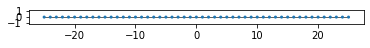

a


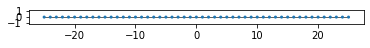

b


In [20]:
kwant.plot(finite_h)
print('a')
kwant.plot(finite_a)
print('b')

In [81]:
A = []
gamma = (1.5*1j+0.15)*0.001
gamma_range = np.arange(-2,2,0.1)
for ind,aux in enumerate(gamma_range):
    print(ind)
    params_h = dict(t1=0.001, t2=0.0002)
    ham_h = finite_h.hamiltonian_submatrix(params = params_h)
    params_a = dict(v1=gamma*aux)
    ham_a = finite_a.hamiltonian_submatrix(params = params_a)
    ham_tot = ham_h + 1j*ham_a  #now this is non-hermitian so I use eig to find eigenstuff
    evals, evecs = np.linalg.eig(ham_tot)
    order = np.argsort(np.abs(evals))
    evals = evals[order]
    A.append(evals)
A = np.array(A)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


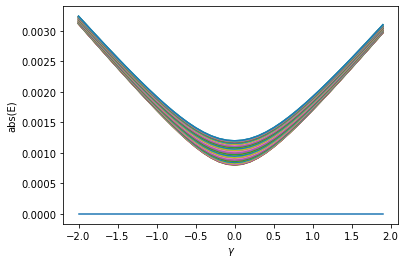

In [82]:
plt.plot(gamma_range, np.abs(A),'-')
plt.xlabel(r'$\gamma$')
plt.ylabel('abs(E)')
plt.savefig("/Users/albertozorzato/Desktop/problem.pdf", bbox_inches='tight')

/Users/albertozorzato/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


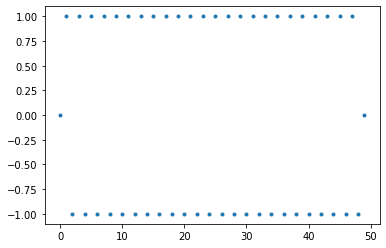

In [9]:
plt.plot(evals, '.')

In [10]:
order = np.argsort(evals.real)

In [11]:
order


array([24, 26, 20, 28, 18, 30, 16, 32, 14, 34, 12, 36, 10, 38,  8, 40,  6,
       42,  4, 44,  2, 46, 22, 48,  0, 49, 47,  1, 45,  3, 43,  5, 41,  7,
       39,  9, 23, 25, 35, 13, 33, 15, 31, 17, 29, 19, 27, 21, 11, 37])

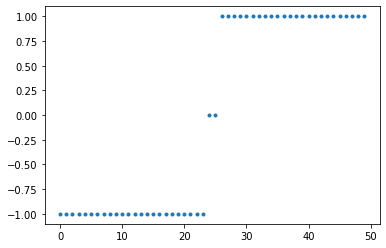

In [12]:




plt.plot(evals[order].real, '.')
                                                #if as an index i put an array of 
    #integers im telling numpy that i want to reorder the array in the way indicated by the list of indices 

In [14]:
density_operator = kwant.operator.Density(finite_h)
densities = []
for v in evecs.T:
    density = density_operator(v)
    norm = np.linalg.norm(v)
    densities.append(density/norm) 

In [15]:
v.shape


(50,)

In [16]:
len(finite_h.sites)


50

In [17]:
density = np.sum(densities, axis = 0)

In [18]:
density


array([4.12727273e+001, 4.36363636e+000, 4.36363636e+000, 4.42240204e-031,
       4.42240204e-031, 9.60341864e-063, 9.60341864e-063, 2.69743024e-094,
       2.69743024e-094, 1.92835449e-125, 1.92835449e-125, 3.09660440e-156,
       3.09660440e-156, 5.96023406e-187, 5.96023406e-187, 1.17240983e-217,
       1.17240983e-217, 2.31154341e-248, 2.31154341e-248, 4.55858659e-279,
       4.55858659e-279, 8.99020045e-310, 8.99020045e-310, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

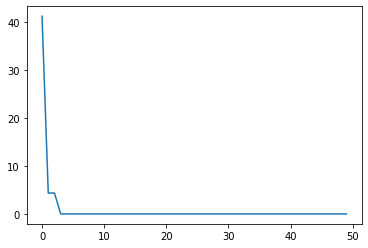

In [19]:
plt.plot(density)

In [20]:

#dt = 0.01 
#T = 6
#n = int(T/dt)
#m = 50 
#eigenvalues = [m, n]
#t1 = -3.0
#t2 = 1.0
#
#for t1 in np.arange(0, 3, 0.1):
#    aux = t1
#    params_h = dict(t1=aux, t2=1.0)
#    ham_h = finite_h.hamiltonian_submatrix(params = params_h)
#    params_a = dict(v1=-1.5)
#    ham_a = finite_a.hamiltonian_submatrix(params = params_a)
#    ham_tot = ham_h +1j*ham_a
#    evals = np.linalg.eig(ham_tot)
#    eigenvalues.append(evals)
#    t1 += 0.1







In [13]:
eigenvalues = []
#from np import array

t1 = -3
t2 = 1
for t1 in np.arange(-3, 3, 0.1):
    aux = t1
    params_h = dict(t1=aux, t2=1)
    ham_h = finite_h.hamiltonian_submatrix(params = params_h)
    params_a = dict(v1=-1.5)
    ham_a = finite_a.hamiltonian_submatrix(params = params_a)
    ham_tot = ham_h +1j*ham_a
    evals, evecs = np.linalg.eig(ham_tot)
    eigenvalues.append(evals)
    

    
len(eigenvalues)   

60